In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns

import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../"))

from custom import functions

warnings.filterwarnings("ignore")

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad.dot
../resources/causalidad\causalidad.png
../resources/causalidad\causalidad2.dot
../resources/causalidad\causalidad_exitosos.dot
../resources/causalidad\causalidad_hito1.dot
../resources/causalidad\graph_exitosos.png
../

In [99]:
df = pd.read_csv(
    "../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True
)

In [100]:
# Convertir la columna "sol1" a números de punto flotante
df["sol1"] = df["sol1"].astype(float)
df["exitosos"] = df["exitosos"].astype(int)
df["fallidos"] = df["fallidos"].astype(int)

In [101]:
df.describe()

,hito1,hito2,exitosos,fallidos,e0,e1,e2,e3,e4,e5,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,13.353993,0.168057,7.476758,11.287247,0.505364,0.009535,0.0,0.352801,0.734207,0.0,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,10.370917,1.929950,5.361101,8.432787,0.500269,0.097239,0.0,0.478126,0.442018,0.0,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,13.000000,0.000000,7.000000,10.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,20.000000,0.000000,11.000000,16.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,42.000000,32.000000,28.000000,47.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [102]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# df["hito1_binario"] = df["hito1"].apply(lambda x: int(x > 0))
# df["hito2_binario"] = df["hito2"].apply(lambda x: int(x > 0))
# df["exitosos_binario"] = df["exitosos"].apply(lambda x: int(x > 0))
# df["fallidos_binario"] = df["fallidos"].apply(lambda x: int(x > 0))

# df.drop(["hito1", "hito2", "exitosos", "fallidos", "sol1"], axis=1, inplace=True)

df.columns
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [103]:
# Selección de características y variable objetivo para los modelos de clasificacion.
y = df["aprobado"]
X = df[
    [
        "hito1",
        "hito2",
        "exitosos",
        "fallidos",
        "e0",
        "e1",
        "e2",
        "e3",
        "e4",
        "e5",
        "e6",
        "e7",
        "e8",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e14",
        "e15",
        "e16",
        "e17",
        "e18",
        "e19",
        "e20",
        "e21",
        "e22",
        "e23",
        "e24",
        "e25",
        "e26",
        "e27",
        "e28",
        "e29",
        "e30",
        "e31",
        "e32",
        "e33",
        "e34",
        "e35",
        "e36",
        "e37",
        "e38",
        "e39",
        "e40",
        "e41",
        "e42",
        "e43",
        "e44",
        "e45",
        "e46",
        "e47",
        "e48",
        "e49",
        "e50",
        "e51",
        "e52",
    ]
]

In [104]:
# Definir los modelos de clasificación
models = [
    ("Decision Tree", DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, min_samples_leaf=1)),
    ("Logistic Regression", LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=150)),
    ("Random Forest", RandomForestClassifier(max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=1502,
        n_estimators=500,)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=150, subsample=1.0)),
]

In [105]:
# Realizar la validación cruzada k-fold
k = 10  # Número de divisiones en k-fold
kf = KFold(n_splits=k, shuffle=True)



In [106]:
# Inicializar el arreglo para almacenar los puntajes F1 de cada modelo
f1_scores = []
for name, model in models:
    model_f1_scores = []  # Almacenar los puntajes F1 de cada iteración de k-fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular el puntaje F1 y agregarlo a la lista de puntajes del modelo
        f1 = f1_score(y_test, y_pred)
        model_f1_scores.append(f1)
    
    # Calcular el promedio del puntaje F1 para el modelo y agregarlo al arreglo general
    avg_f1 = np.mean(model_f1_scores)
    f1_scores.append((name, avg_f1))



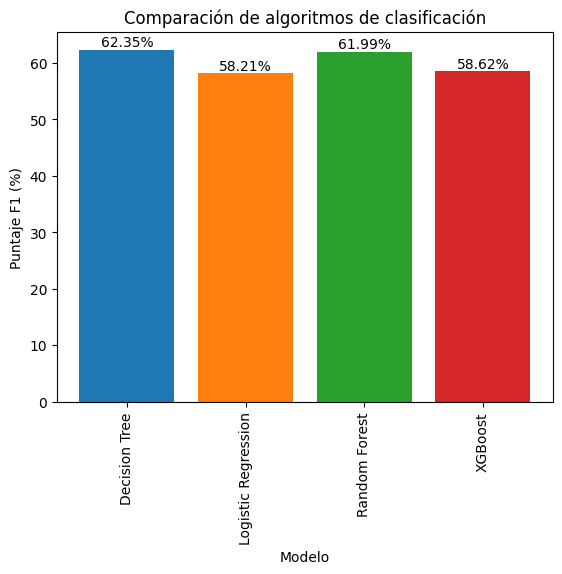

In [107]:
# Obtener los nombres de los modelos y los puntajes F1 en forma de porcentaje
model_names = [score[0] for score in f1_scores]
f1_scores_values = [score[1] * 100 for score in f1_scores]

# Graficar los resultados
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
plt.bar(model_names, f1_scores_values, color=colors)
plt.xlabel("Modelo")
plt.ylabel("Puntaje F1 (%)")
plt.title("Comparación de algoritmos de clasificación")
plt.xticks(rotation=90)

# Agregar etiquetas de porcentaje en medio a la derecha de cada barra
for i, value in enumerate(f1_scores_values):
    plt.text(i, value, f"{value:.2f}%", ha="center", va="bottom", color="black")

plt.show()